In [1]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
#from ImageDataset import ImageDataset
from image_dataset import ImageDataset
from torch import nn
import torch

# Set the path to the folder containing your unlabeled images
train_path = "data/DIV2K/train"
test_path = "data/DIV2K/valid"

# Define the transformation to be applied to each image
transform = transforms.Compose([
    #transforms.Resize((256, 256)),  # Resize the image to a fixed size
    transforms.RandomCrop((512,512)),
    transforms.RandomHorizontalFlip(p=0.5),
    # transforms.RandomRotation(45),
    transforms.ToTensor()  # Convert the image to a tensor
])

# Create the ImageFolder dataset
train_data = ImageDataset(train_path, transform=transform)

test_data = ImageDataset(test_path, transform=transform)

In [2]:
from torch.utils.data import DataLoader
train_data_loader = DataLoader(dataset=train_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_data_loader = DataLoader(dataset=test_data, 
                              batch_size=8, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

In [3]:
#img, label = train_data[0][0], train_data[0][1]
img = train_data[0]
#class_names = train_data.classes
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"img range = [{torch.min(img)}, {torch.max(img)}]")
#print(f"Image label: {label}")
#print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.3098, 0.2824, 0.2588,  ..., 0.4941, 0.4471, 0.3569],
         [0.2667, 0.2235, 0.2275,  ..., 0.5098, 0.4588, 0.3804],
         [0.1843, 0.1647, 0.1725,  ..., 0.5529, 0.5333, 0.4667],
         ...,
         [0.4471, 0.4196, 0.4353,  ..., 0.5686, 0.5176, 0.4902],
         [0.4706, 0.4235, 0.4353,  ..., 0.5529, 0.4706, 0.4275],
         [0.4706, 0.4588, 0.4235,  ..., 0.5216, 0.4392, 0.4078]],

        [[0.2314, 0.2039, 0.1765,  ..., 0.3647, 0.3608, 0.3020],
         [0.1882, 0.1412, 0.1451,  ..., 0.3686, 0.3804, 0.3490],
         [0.1176, 0.1098, 0.1137,  ..., 0.4000, 0.4745, 0.4980],
         ...,
         [0.1059, 0.0627, 0.0627,  ..., 0.2314, 0.1922, 0.1804],
         [0.1137, 0.0588, 0.0510,  ..., 0.2196, 0.1608, 0.1294],
         [0.1137, 0.0745, 0.0667,  ..., 0.1961, 0.1373, 0.1137]],

        [[0.1765, 0.1412, 0.1098,  ..., 0.3451, 0.3529, 0.3529],
         [0.1255, 0.0980, 0.0941,  ..., 0.3843, 0.3961, 0.4353],
         [0.0706, 0.0706, 0.0706,  ..., 0.36

Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


(-0.5, 511.5, 511.5, -0.5)

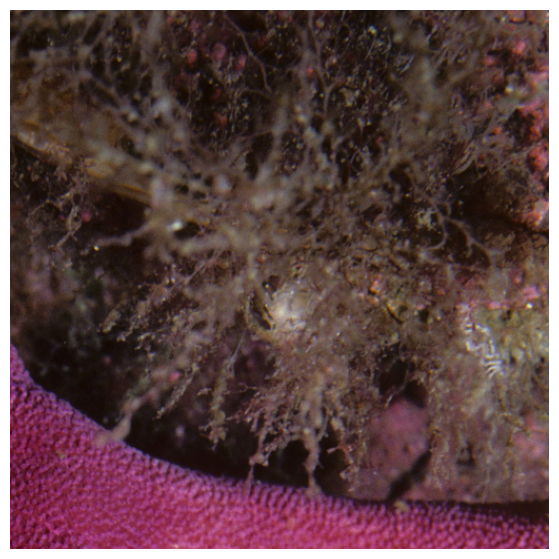

In [4]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
#plt.title(class_names[label], fontsize=14)

In [5]:
next(iter(train_data_loader)).shape

torch.Size([8, 3, 512, 512])

In [6]:
from pathlib import Path
# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "autoencoder_upsampler_res_blocks_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [7]:
#from autoencoder_upscale_model import AutoencoderUpscaleModel
import torch
from residual_upsampler_2 import ResidualUpsampler2
#from my_upscale_model import UpscaleModel
from my_upscale_model2 import UpscaleModel2
##from autoencoder_upsampler_2 import AutoencoderUpsampler2
from train_autoencoder import downsample_image

device = "cpu"

batch = next(iter(test_data_loader))

#model = UpscaleModel2()
#model = AutoencoderUpsampler2()
model = ResidualUpsampler2()

model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

model.to(device)

img = downsample_image(batch, 4)
model.eval()
with torch.inference_mode():
    result = model(img.to(device))



Original shape: torch.Size([3, 128, 128]) -> [color_channels, height, width]
Image permute shape: torch.Size([128, 128, 3]) -> [height, width, color_channels]


(-0.5, 127.5, 127.5, -0.5)

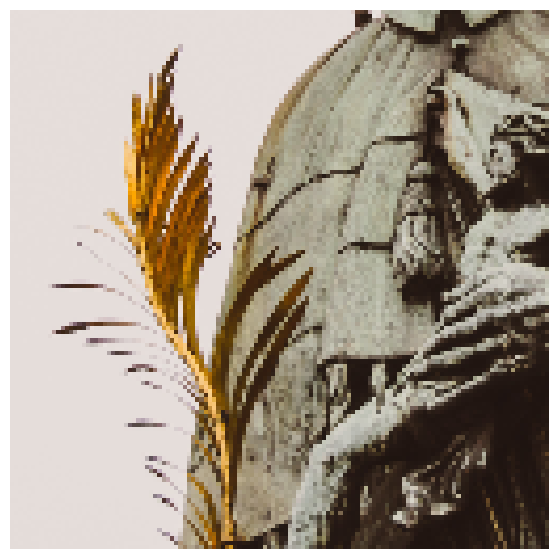

In [8]:
img = downsample_image(batch, 4)[1]
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [9]:
img

tensor([[[0.9020, 0.9010, 0.9020,  ..., 0.3588, 0.3775, 0.4686],
         [0.9000, 0.9020, 0.8990,  ..., 0.5461, 0.3980, 0.3598],
         [0.9020, 0.9010, 0.9010,  ..., 0.5559, 0.5647, 0.4912],
         ...,
         [0.8971, 0.8980, 0.8971,  ..., 0.1735, 0.1314, 0.2029],
         [0.8961, 0.8971, 0.8980,  ..., 0.1941, 0.1382, 0.2137],
         [0.8961, 0.8971, 0.8961,  ..., 0.2510, 0.1431, 0.1539]],

        [[0.8706, 0.8696, 0.8706,  ..., 0.2941, 0.3127, 0.4216],
         [0.8686, 0.8706, 0.8676,  ..., 0.4873, 0.3333, 0.2912],
         [0.8706, 0.8696, 0.8696,  ..., 0.5127, 0.5118, 0.4255],
         ...,
         [0.8657, 0.8667, 0.8657,  ..., 0.1196, 0.0902, 0.1510],
         [0.8647, 0.8657, 0.8667,  ..., 0.1422, 0.0961, 0.1735],
         [0.8647, 0.8657, 0.8647,  ..., 0.1912, 0.0980, 0.1098]],

        [[0.8588, 0.8578, 0.8588,  ..., 0.2324, 0.2284, 0.3118],
         [0.8569, 0.8588, 0.8559,  ..., 0.4225, 0.2686, 0.2108],
         [0.8588, 0.8578, 0.8578,  ..., 0.4343, 0.4255, 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Original shape: torch.Size([3, 512, 512]) -> [color_channels, height, width]
Image permute shape: torch.Size([512, 512, 3]) -> [height, width, color_channels]


(-0.5, 511.5, 511.5, -0.5)

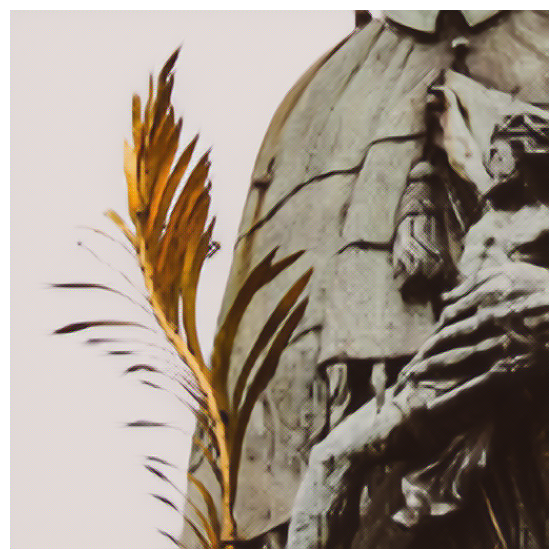

In [10]:
img = result[1].cpu()
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")

In [11]:
result.shape

torch.Size([8, 3, 512, 512])

In [12]:
img.shape

torch.Size([3, 512, 512])

In [13]:
result[1]

tensor([[[0.9538, 0.8397, 0.8470,  ..., 0.3534, 0.4117, 0.3604],
         [0.7322, 1.0758, 0.8124,  ..., 0.5618, 0.4480, 0.4195],
         [0.9518, 0.7544, 0.8801,  ..., 0.3344, 0.3689, 0.4805],
         ...,
         [0.7521, 1.0444, 0.7869,  ..., 0.2149, 0.1797, 0.1658],
         [0.8610, 0.9044, 0.8153,  ..., 0.1269, 0.1289, 0.1972],
         [0.8316, 0.7804, 0.9244,  ..., 0.1404, 0.1973, 0.1574]],

        [[0.7652, 0.8323, 0.8567,  ..., 0.3841, 0.3547, 0.3845],
         [0.9115, 0.7981, 0.8989,  ..., 0.3560, 0.4632, 0.3525],
         [0.8966, 0.8094, 0.8845,  ..., 0.3237, 0.4218, 0.3359],
         ...,
         [0.8626, 0.7938, 0.9512,  ..., 0.1112, 0.1458, 0.1293],
         [0.9159, 0.8385, 0.8357,  ..., 0.0879, 0.1357, 0.1191],
         [0.7949, 0.8856, 0.7785,  ..., 0.1619, 0.1123, 0.1455]],

        [[0.8294, 0.9568, 0.8234,  ..., 0.4131, 0.2903, 0.3038],
         [0.9630, 0.7430, 0.8002,  ..., 0.2419, 0.2714, 0.3049],
         [0.7387, 1.0253, 0.8469,  ..., 0.3936, 0.2497, 0.

In [14]:
img1 = downsample_image(batch, factor=4)
img1.shape

torch.Size([8, 3, 128, 128])

In [15]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[[[ 8.1028e-02, -1.5480e-04,  1.0549e-01, -4.9235e-02,  1.9510e-02],
          [ 7.9103e-02,  1.1471e-01,  5.8872e-02, -6.0208e-02, -1.0500e-01],
          [-6.7707e-02, -1.0463e-01, -1.0990e-01,  6.1935e-02, -5.2329e-02],
          [ 3.4421e-03,  6.4768e-02,  9.1921e-02, -3.9390e-02, -4.4152e-02],
          [ 3.3984e-02,  3.6179e-03,  2.1995e-02, -8.8143e-02, -8.3305e-03]],

         [[-9.2155e-02,  6.9882e-03, -9.1169e-02,  3.7666e-02,  1.0103e-01],
          [-9.3214e-03,  1.4103e-01, -1.7175e-01,  8.1551e-02,  6.7412e-03],
          [ 5.2930e-02, -1.1751e-01, -2.5768e-01,  1.2257e-01,  7.5815e-02],
          [ 1.4896e-02, -3.5464e-02, -3.9687e-02, -2.9863e-02,  5.2021e-03],
          [ 4.6463e-02,  1.5305e-02,  9.2877e-02, -1.1262e-02,  1.2116e-02]],

         [[-4.3325e-02, -6.7246e-02, -3.4758e-02,  5.4746e-02,  1.3130e-02],
          [-6.1741e-02,  2.6816e-03,  2.1840e-02,  1.9907e-03,  7.2873e-02],
          [ 6.0071e-02,  1.8738e-02,  6.6994e-02, 

In [16]:
loss_fn = torch.nn.MSELoss(reduction='sum')

In [17]:
batch.shape, result.shape

(torch.Size([8, 3, 512, 512]), torch.Size([8, 3, 512, 512]))

In [18]:
loss = loss_fn(result, batch.to(device))
loss

tensor(76614.2578)

In [19]:
type(model)

residual_upsampler_2.ResidualUpsampler2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 511.5, 511.5, -0.5)

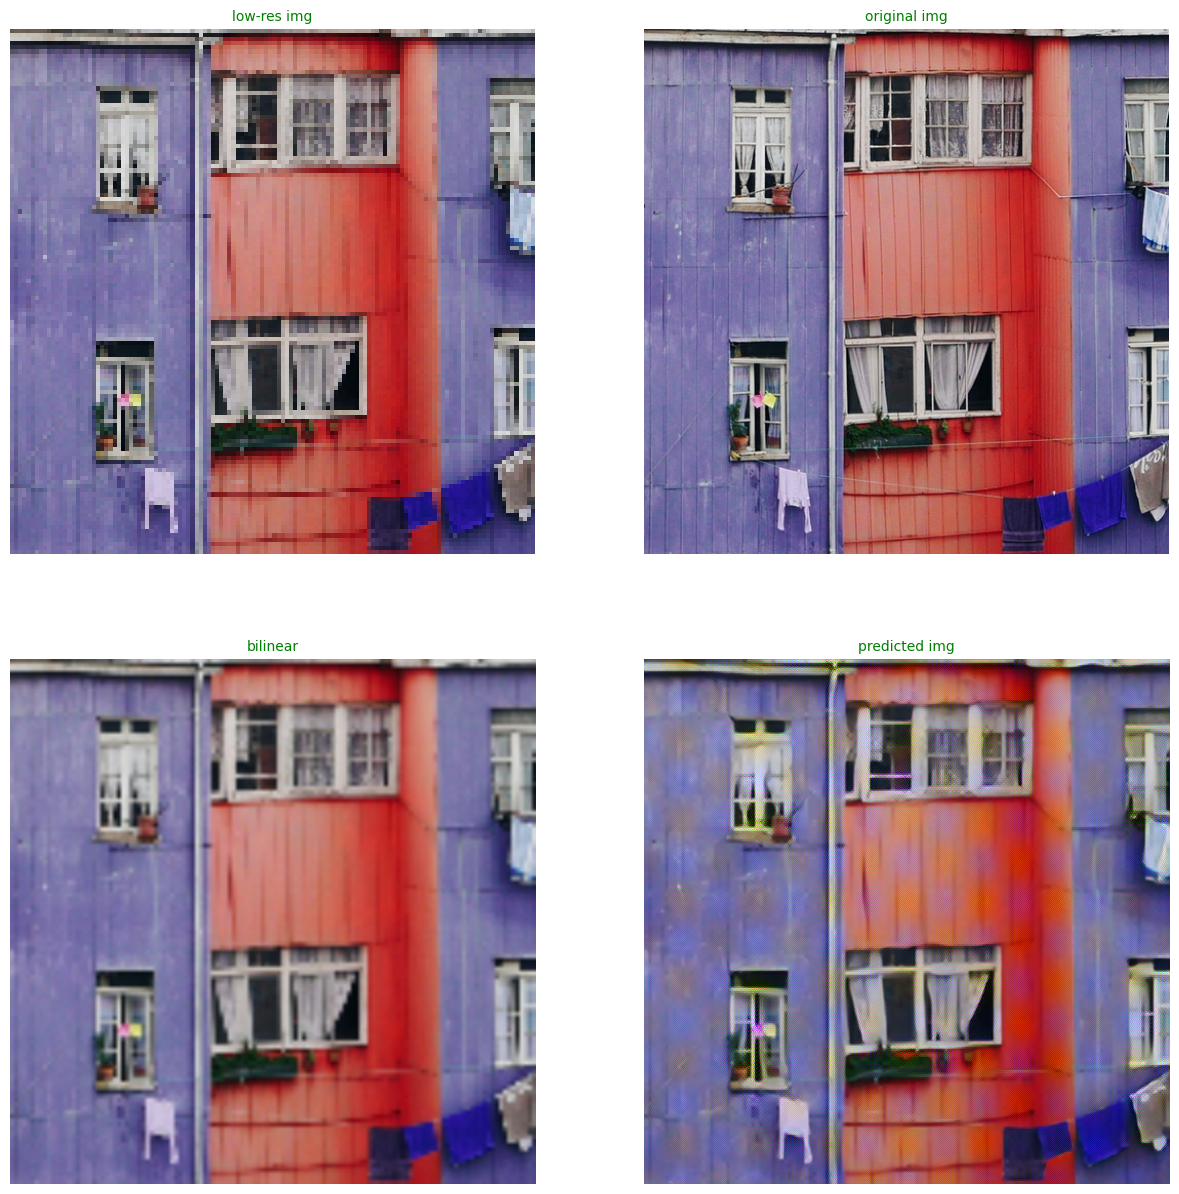

In [42]:
i = 7
y = batch[i]
y_pred = result[i]

upsample = nn.Upsample(scale_factor=4, mode="bilinear")

# Plot predictions
plt.figure(figsize=(15, 15))
nrows = 2
ncols = 2

plt.subplot(nrows, ncols, 1)
plt.imshow(downsample_image(y.unsqueeze(dim=0), factor=4).squeeze().permute(1, 2, 0))
plt.title("low-res img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 3)
plt.imshow(upsample(downsample_image(y.unsqueeze(dim=0), factor=4)).squeeze().permute(1, 2, 0))
plt.title("bilinear", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 4)
plt.imshow(y_pred.permute(1, 2, 0))
plt.title("predicted img", fontsize=10, c="g") # green text if correct
plt.axis(False)

plt.subplot(nrows, ncols, 2)
plt.imshow(y.permute(1, 2, 0))
plt.title("original img", fontsize=10, c="g") # green text if correct
plt.axis(False)

In [21]:
from vgg_loss import VGGLoss
vgg_loss_fn = VGGLoss(device="cpu")


d:\oleyon\github_repo\deep_learning_diploma\.venv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\oleyon\github_repo\deep_learning_diploma\.venv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [22]:
some_loss = vgg_loss_fn.forward_demo(batch[i])
some_loss.shape

torch.Size([512, 64, 64])

In [23]:
i=0
for param in vgg_loss_fn.vgg.parameters():
    print(param.shape)
    i+=1
i

torch.Size([64, 3, 3, 3])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])


20

Original shape: torch.Size([64, 64]) -> [height, width]


(-0.5, 63.5, 63.5, -0.5)

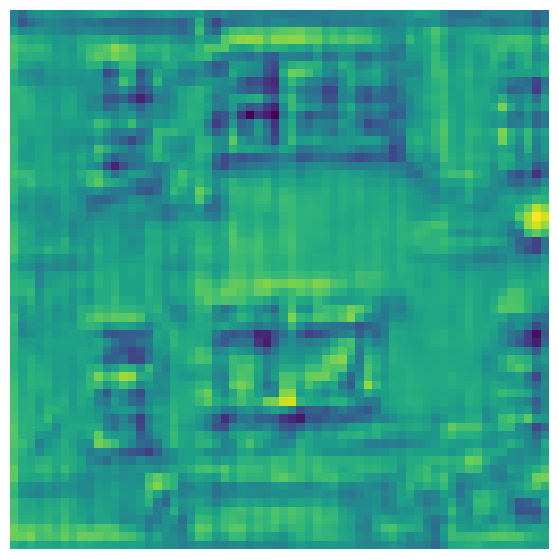

In [24]:
img = some_loss[11].cpu()

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [height, width]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis("off")

In [25]:
# from collections import OrderedDict

# import torch
# from torch import nn, optim

# from ignite.engine import *
# from ignite.handlers import *
# from ignite.metrics import *
# from ignite.utils import *
# from ignite.contrib.metrics.regression import *
# from ignite.contrib.metrics import *

# # create default evaluator for doctests

# def eval_step(engine, batch):
#     return batch

# default_evaluator = Engine(eval_step)

# # create default optimizer for doctests

# param_tensor = torch.zeros([1], requires_grad=True)
# default_optimizer = torch.optim.SGD([param_tensor], lr=0.1)

# # create default trainer for doctests
# # as handlers could be attached to the trainer,
# # each test must define his own trainer using `.. testsetup:`

# def get_default_trainer():

#     def train_step(engine, batch):
#         return batch

#     return Engine(train_step)

# # create default model for doctests

# default_model = nn.Sequential(OrderedDict([
#     ('base', nn.Linear(4, 2)),
#     ('fc', nn.Linear(2, 1))
# ]))

# #manual_seed(666)

# test_y_pred = torch.randn((3,512,512))

# from ignite.metrics import *
# metric = SSIM(data_range=1.0)
# metric.attach(default_evaluator, 'ssim')
# state = default_evaluator.run([[y_pred.unsqueeze(dim=0), y.unsqueeze(dim=0)]])
# print(state.metrics['ssim'])
# print(f"ssim loss = {torch.tensor((1 - state.metrics['ssim'])/2)}")

In [26]:
# from custom_loss import SSIMLoss, VGGPerceptualLoss, SSIM, CombinedLoss

# ssim_loss_fn = SSIM(window_size=11,sigma=1.5)
# vgg_loss_fn = VGGPerceptualLoss()
# vgg_ssim_fn = CombinedLoss(loss_shift=1.0)
# ssim_loss_res = ssim_loss_fn(y_pred.unsqueeze(dim=0), y.unsqueeze(dim=0))
# vgg_loss_fn.to('cuda')
# vgg_loss_res = vgg_loss_fn(y_pred.unsqueeze(dim=0).to('cuda'), y.unsqueeze(dim=0).to('cuda'))
# true_loss_res = vgg_ssim_fn(y_pred.unsqueeze(dim=0), y.unsqueeze(dim=0))
# loss_res = vgg_loss_res + 1 * ssim_loss_res
# #vgg_loss_fn.to('cuda')
# for param in vgg_loss_fn.parameters():
#     print(param.device)
# ssim_loss_res, vgg_loss_res, loss_res, true_loss_res

In [27]:
import math

window_size = 11
sigma = 1.5
gauss = torch.Tensor([math.exp(-(x - window_size // 2) ** 2 / float(2 * sigma ** 2)) for x in range(window_size)])
window = gauss.unsqueeze(0) * gauss.unsqueeze(1)

In [28]:
gauss

tensor([0.0039, 0.0286, 0.1353, 0.4111, 0.8007, 1.0000, 0.8007, 0.4111, 0.1353,
        0.0286, 0.0039])

(-0.5, 10.5, 10.5, -0.5)

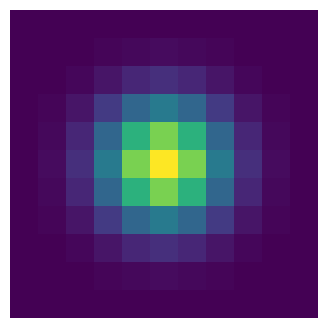

In [29]:
plt.figure(figsize=(4, 4))
plt.imshow(window)
plt.axis("off")

In [30]:
from train_statistics import TrainingStatisticsLogger
import os
print(os.getcwd())
logger = TrainingStatisticsLogger()
logger.load_from_json(filename='log/autoencoder_upsampler_res_blocks_2_test_log.json')
logger.ssim.__len__()

d:\oleyon\github_repo\deep_learning_diploma\diploma


380

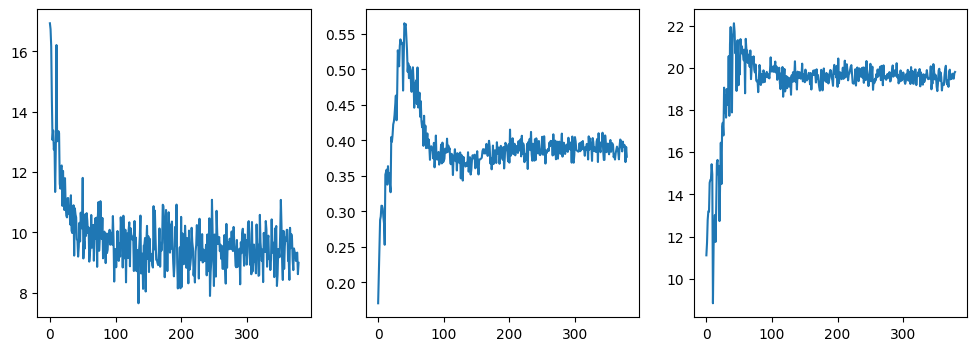

In [31]:
plt.figure(figsize=(12, 4))
plt.subplot(1,3,1)
plt.plot(logger.epoch_loss)
plt.subplot(1,3,2)
plt.plot(logger.ssim)
plt.subplot(1,3,3)
plt.plot(logger.psnr)

torch.Size([1, 128, 256, 256])
Original shape: torch.Size([256, 256]) -> [height, width]


(-0.5, 255.5, 255.5, -0.5)

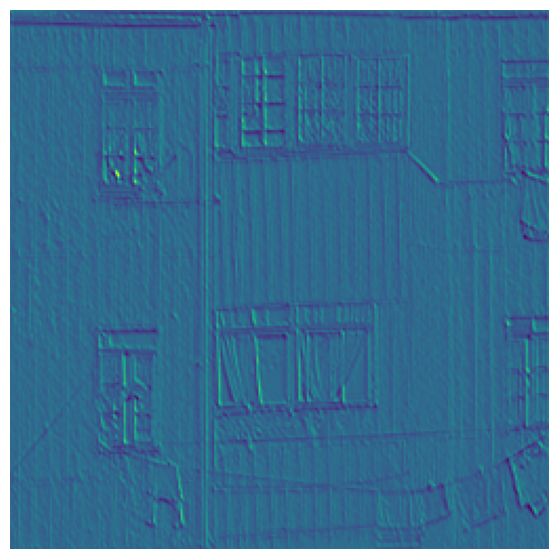

In [32]:
from custom_loss import VGG
vgg_loss = VGG('22')

sm_ls = vgg_loss.forward1(y.unsqueeze(0))
print(sm_ls.shape)
img = sm_ls[0][1].cpu().squeeze()

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [height, width]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis("off")

In [33]:
sm_ls = vgg_loss.forward(upsample(downsample_image(y.unsqueeze(dim=0), factor=4)), y.unsqueeze(0))
sm_ls

tensor(13.6698)

In [34]:
from metrics import SSIM, PSNR


ssim = SSIM()
print(f'bilinear: {ssim(upsample(downsample_image(y.unsqueeze(dim=0), factor=4)), y.unsqueeze(0))}')
print(f'bilinear: {ssim(y_pred.unsqueeze(dim=0), y.unsqueeze(0))}')

bilinear: 0.6583935022354126
bilinear: 0.31715109944343567
